In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

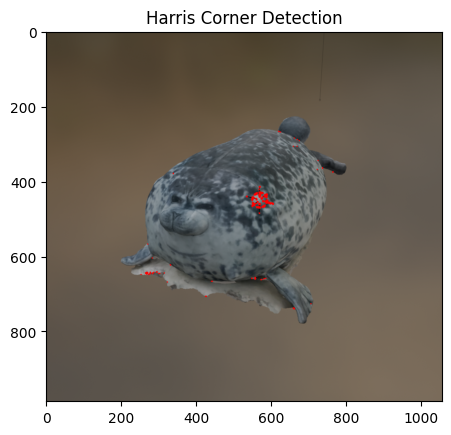

array([[[ 45,  64,  73],
        [ 46,  64,  72],
        [ 47,  63,  73],
        ...,
        [ 50,  67,  75],
        [ 50,  67,  74],
        [ 48,  66,  74]],

       [[ 47,  63,  73],
        [ 46,  64,  73],
        [ 47,  64,  72],
        ...,
        [ 49,  67,  75],
        [ 51,  68,  75],
        [ 50,  67,  76]],

       [[ 46,  63,  72],
        [ 47,  64,  73],
        [ 46,  63,  72],
        ...,
        [ 50,  67,  74],
        [ 49,  67,  73],
        [ 50,  67,  74]],

       ...,

       [[ 75,  82,  89],
        [ 74,  80,  88],
        [ 74,  81,  89],
        ...,
        [ 90, 106, 120],
        [ 90, 107, 122],
        [ 90, 106, 121]],

       [[ 73,  81,  88],
        [ 72,  82,  89],
        [ 73,  82,  89],
        ...,
        [ 91, 107, 122],
        [ 91, 107, 121],
        [ 90, 107, 122]],

       [[ 73,  81,  89],
        [ 73,  81,  88],
        [ 74,  82,  88],
        ...,
        [ 91, 106, 122],
        [ 91, 107, 121],
        [ 90, 107, 121]]

In [ ]:
# Load the image from the GitHub repository
url = "https://github.com/themselg04/cv2practice/blob/main/Harris%20Corner%20Detection/foca1.png?raw=true"
response = requests.get(url)
img1 = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection
dst1 = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.01)

# Dilate the result to mark the corners
dst1 = cv2.dilate(dst1, None)

# Threshold the result to identify strong corners
img1[dst1 > 0.001 * dst1.max()] = [0, 0, 255]

# Display the image with detected corners using pyplot.imshow
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for pyplot
plt.title('Harris Corner Detection')
plt.show()
img1

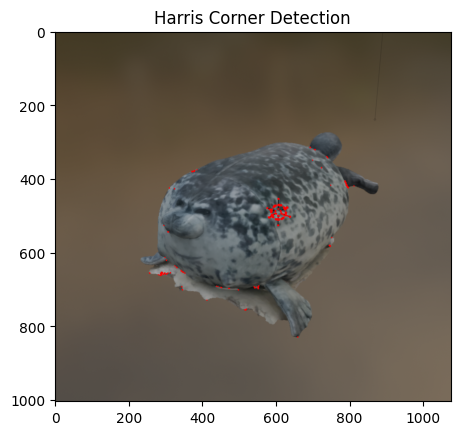

array([[[ 36,  59,  67],
        [ 36,  60,  69],
        [ 36,  60,  67],
        ...,
        [ 41,  60,  67],
        [ 39,  59,  66],
        [ 40,  60,  67]],

       [[ 37,  59,  68],
        [ 36,  59,  68],
        [ 38,  59,  69],
        ...,
        [ 40,  59,  66],
        [ 40,  60,  66],
        [ 40,  60,  66]],

       [[ 36,  59,  67],
        [ 37,  60,  68],
        [ 37,  60,  68],
        ...,
        [ 40,  60,  65],
        [ 39,  60,  66],
        [ 40,  59,  65]],

       ...,

       [[ 71,  77,  83],
        [ 72,  77,  82],
        [ 72,  78,  83],
        ...,
        [ 91, 108, 122],
        [ 91, 108, 122],
        [ 90, 107, 122]],

       [[ 72,  78,  83],
        [ 71,  78,  83],
        [ 72,  77,  84],
        ...,
        [ 92, 109, 123],
        [ 91, 108, 122],
        [ 90, 107, 122]],

       [[ 71,  77,  82],
        [ 72,  78,  83],
        [ 71,  77,  82],
        ...,
        [ 89, 106, 121],
        [ 91, 108, 123],
        [ 90, 108, 122]]

In [ ]:
# Load the image from the GitHub repository
url = "https://github.com/themselg04/cv2practice/blob/main/Harris%20Corner%20Detection/foca2.png?raw=true"
response = requests.get(url)
img2 = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection
dst2 = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.01)

# Dilate the result to mark the corners
dst2 = cv2.dilate(dst2, None)

# Threshold the result to identify strong corners
img2[dst2 > 0.001 * dst2.max()] = [0, 0, 255]

# Display the image with detected corners using pyplot.imshow
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for pyplot
plt.title('Harris Corner Detection')
plt.show()
img2

In [ ]:
def calculate_corner_histograms(img, dst, patch_size=15):
  corner_histograms = []
  corners = np.argwhere(dst > 0.001 * dst.max())

  for corner in corners:
    y, x = corner
    # Extract a patch around the corner
    patch = img[max(0, y - patch_size // 2):min(img.shape[0], y + patch_size // 2),
              max(0, x - patch_size // 2):min(img.shape[1], x + patch_size // 2)]

    # Calculate the histogram for the patch (e.g., using HSV color space)
    hsv_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_patch], [0, 1], None, [8, 8], [0, 180, 0, 256])
    corner_histograms.append(hist.flatten())

  return corner_histograms


corner_histograms1 = calculate_corner_histograms(img1, dst1)
corner_histograms2 = calculate_corner_histograms(img2, dst2)


# Match histograms using a distance metric (e.g., Euclidean distance)
matched_corners = []
for i, hist1 in enumerate(corner_histograms1):  # Enumerate to get the index
  min_dist = float('inf')
  best_match = None
  for j, hist2 in enumerate(corner_histograms2):
    dist = np.linalg.norm(hist1 - hist2)
    if dist < min_dist:
      min_dist = dist
      best_match = j

  if best_match is not None:
    matched_corners.append((i, best_match))  # Use the index 'i' directly

# Calculate movement based on matched corners
if matched_corners:
  src_pts = np.float32([np.argwhere(dst1 > 0.001 * dst1.max())[i] for i, _ in matched_corners]).reshape(-1, 1, 2)
  dst_pts = np.float32([np.argwhere(dst2 > 0.001 * dst2.max())[i] for _, i in matched_corners]).reshape(-1, 1, 2)

  # Find homography matrix
  M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

  # Calculate the movement using the homography matrix
  movement = np.array([M[0][2], M[1][2]])

  print("Movement:", movement)
else:
  print("No matching corners found.")


Movement: [484.82068694 618.70616071]
